In [35]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
from random import random

# Загрузка изображения

(540, 405, 3)

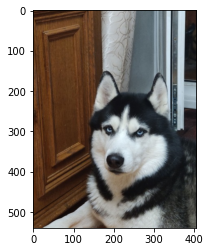

In [36]:
input_image = cv2.imread("/content/dog.jpg")
demonstration_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(demonstration_image)
input_image.shape

# Convolution (3 фильтра размером 3x3x3)

In [37]:
image = input_image
image_rows, image_columns, image_channels = image.shape

filters = np.random.uniform(size = (3, 3, 3, 3))
N, filter_rows, filter_columns, filter_channels = filters.shape

result = np.zeros((image_rows, image_columns, N), 'float')
B = [random() for i in range(N)]

for row in range(image_rows):
    for column in range(image_columns):
        for n in range(N):
            result[row][column][n] = B[n]
            for filter_channel in range(filter_channels):
                for filter_column in range(filter_columns):
                    for filter_row in range(filter_rows):
                        if (row + filter_row < image_rows) and (column + filter_column < image_columns):                        
                            result[row][column][n] += np.dot(filters[n][filter_row][filter_column][filter_channel], image[row + filter_row][column + filter_column][filter_channel])

print(f"{result.shape}\n{result}")

(540, 405, 3)
[[[1263.78405138 1235.36679105 1418.25773481]
  [1251.14614883 1219.56747171 1392.86296945]
  [1246.01926748 1215.19136178 1389.16069297]
  ...
  [ 500.66725413  479.83793962  571.92705295]
  [ 325.81365302  341.35619135  356.25377016]
  [ 144.83338612  172.36088362  172.99445866]]

 [[1092.96638906 1071.7512436  1216.61862758]
  [1065.18614274 1037.82022279 1175.15366356]
  [1058.36587349 1033.92797168 1170.05765197]
  ...
  [ 495.66003021  475.86153898  565.65603413]
  [ 320.77123761  336.43608269  349.14801298]
  [ 142.11974335  169.29442805  168.97942875]]

 [[ 886.29936973  872.96376943  986.35004795]
  [ 859.99112342  839.04531099  953.42540982]
  [ 856.23236705  836.04677602  941.09267622]
  ...
  [ 492.19916569  472.01756005  561.36315093]
  [ 317.68271934  332.02656325  346.17209667]
  [ 141.76161933  168.10414115  168.00430993]]

 ...

 [[1092.80261765 1043.60013725 1270.15186033]
  [1103.08439751 1060.63979137 1264.56613069]
  [1067.06956176 1038.75136573 1220.

# ReLu 

In [38]:
image = result
image_rows, image_columns, image_channels = image.shape

result = np.zeros((image_rows, image_columns, image_channels), 'float')

for row in range(image_rows):
    for column in range(image_columns):
        for channel in range(image_channels):    
            result[row][column][channel] = np.maximum(0, image[row][column][channel])

print(f"{result.shape}\n{result}")

(540, 405, 3)
[[[1263.78405138 1235.36679105 1418.25773481]
  [1251.14614883 1219.56747171 1392.86296945]
  [1246.01926748 1215.19136178 1389.16069297]
  ...
  [ 500.66725413  479.83793962  571.92705295]
  [ 325.81365302  341.35619135  356.25377016]
  [ 144.83338612  172.36088362  172.99445866]]

 [[1092.96638906 1071.7512436  1216.61862758]
  [1065.18614274 1037.82022279 1175.15366356]
  [1058.36587349 1033.92797168 1170.05765197]
  ...
  [ 495.66003021  475.86153898  565.65603413]
  [ 320.77123761  336.43608269  349.14801298]
  [ 142.11974335  169.29442805  168.97942875]]

 [[ 886.29936973  872.96376943  986.35004795]
  [ 859.99112342  839.04531099  953.42540982]
  [ 856.23236705  836.04677602  941.09267622]
  ...
  [ 492.19916569  472.01756005  561.36315093]
  [ 317.68271934  332.02656325  346.17209667]
  [ 141.76161933  168.10414115  168.00430993]]

 ...

 [[1092.80261765 1043.60013725 1270.15186033]
  [1103.08439751 1060.63979137 1264.56613069]
  [1067.06956176 1038.75136573 1220.

# MaxPooling (2x2)

In [39]:
image = result
image_rows, image_columns, image_channels = image.shape

half_rows = int(image_rows / 2)
half_columns = int(image_columns / 2)

result = np.zeros((half_rows, half_columns, 3),'float')

for row in range(half_rows):
    for column in range(half_columns):
        for channel in range(image_channels):    
            result[row, column, channel] = max(image[row * 2, column * 2, channel], image[row * 2, column * 2 + 1, channel], image[row * 2 + 1, column * 2, channel], image[row * 2 + 1, column * 2 + 1, channel])

print(f"{result.shape}\n{result}")

(270, 202, 3)
[[[1263.78405138 1235.36679105 1418.25773481]
  [1249.42330539 1216.05382018 1393.22393247]
  [1260.94149115 1223.21396834 1389.74424715]
  ...
  [ 554.40813752  531.14586432  635.08120119]
  [ 517.78566797  497.18703547  596.66859372]
  [ 500.66725413  479.83793962  571.92705295]]

 [[ 886.29936973  872.96376943  986.35004795]
  [ 856.23236705  836.04677602  941.09267622]
  [ 817.81038552  800.06334216  897.05240954]
  ...
  [ 574.03951269  548.39830029  656.13322797]
  [ 541.5529639   521.49278396  622.248166  ]
  [ 493.62857237  473.73839852  564.91131589]]

 [[ 557.50387062  531.26164378  600.49222749]
  [ 536.69418056  512.45351133  583.73797787]
  [ 512.99902183  493.919623    564.04903741]
  ...
  [ 580.05233465  553.3729414   663.03428397]
  [ 544.57610768  526.3077369   623.51455057]
  [ 495.87144643  476.04755544  568.55414468]]

 ...

 [[1001.61080431  960.36684782 1173.37146625]
  [1033.64526355 1000.89849574 1206.53093721]
  [1028.46082329  998.6531256  1180.

# Попиксельный SoftMax

In [40]:
image = result
image_rows, image_columns, image_channels = image.shape

result = np.zeros((image_rows, image_columns, image_channels), 'float')
    
for row in range(image_rows):
    for column in range(image_columns):
        temp = 0
        for channel in range(image_channels):
            temp += np.exp(image[row, column, channel], dtype = np.float128)
        for channel1 in range(image_channels):
            result[row, column, channel1] = np.exp(image[row, column, channel1], dtype = np.float128) / temp

print(f"{result.shape}\n{result}")

(270, 202, 3)
[[[8.18336057e-068 3.72796938e-080 1.00000000e+000]
  [3.53330531e-063 1.13762172e-077 1.00000000e+000]
  [1.15258727e-056 4.75136995e-073 1.00000000e+000]
  ...
  [9.20732792e-036 7.26869965e-046 1.00000000e+000]
  [5.51544594e-035 6.24752784e-044 1.00000000e+000]
  [1.12787921e-031 1.01439299e-040 1.00000000e+000]]

 [[3.53624659e-044 5.71432475e-050 1.00000000e+000]
  [1.39841474e-037 2.39411602e-046 1.00000000e+000]
  [3.85146746e-035 7.55410878e-043 1.00000000e+000]
  ...
  [2.22409050e-036 1.62672971e-047 1.00000000e+000]
  [9.00573189e-036 1.74780734e-044 1.00000000e+000]
  [1.10229499e-031 2.53574215e-040 1.00000000e+000]]

 [[2.13990171e-019 8.58103189e-031 1.00000000e+000]
  [3.70798885e-021 1.10039735e-031 1.00000000e+000]
  [6.74931870e-023 3.49286905e-031 1.00000000e+000]
  ...
  [9.14949901e-037 2.36964912e-048 1.00000000e+000]
  [5.21758870e-035 6.07599239e-043 1.00000000e+000]
  [2.71834905e-032 6.68188129e-041 1.00000000e+000]]

 ...

 [[2.54268353e-075 3